In [13]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [8]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': \
         'BTCUSDT:binance',
         'freq': '30Min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
print(time()-start)

4.562148094177246


In [34]:
for n in Time_dict.keys():
    data1H = Time_dict[n].set_index('datetime')

In [36]:
from matplotlib.pylab import date2num

data1H['candleTime'] = list(map(date2num, data1H.index))
candle = data1H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

In [9]:
#调用模块
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()

In [10]:
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [22]:
Morningstar = dv1H.add_formula('Morningstar', "If((Ta('CDLMORNINGSTAR', 0, open, high, low, close, volume)==100),100,0)", add_data=True)

In [23]:
MorningstarVolume = dv1H.get_ts('Morningstar', date_type='datetime')

In [24]:
MorningstarVolume[MorningstarVolume['BTCUSDT:binance']==100]

symbol,BTCUSDT:binance
trade_date,
2018-06-15 22:00:00,100.0
2018-07-12 11:00:00,100.0
2018-07-19 06:00:00,100.0
2018-08-09 17:00:00,100.0
2018-08-31 04:00:00,100.0
2018-09-11 02:00:00,100.0
2018-09-18 01:00:00,100.0
2018-09-19 09:00:00,100.0


In [38]:
MorningstarVolumeX = MorningstarVolume[MorningstarVolume['BTCUSDT:binance']==100].index
MorningstarVolumeY = data1H.loc[MorningstarVolumeX].low-100

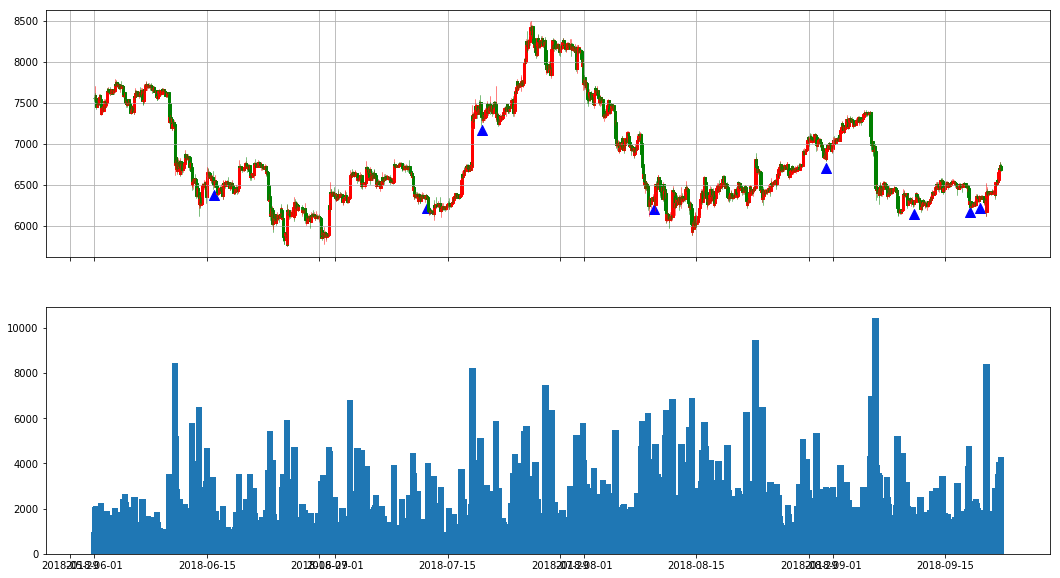

In [40]:
import matplotlib.pyplot as plt
import mpl_finance as mpf

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data1H.index, data1H.volume)
    plt.show()
draw_candle(candle, MorningstarVolumeX, MorningstarVolumeY)